In [1]:
import pandas as pd
import numpy as np

## データの連結

In [2]:
subjects_list = ['F', 'G', 'H', 'I']

df_params = pd.DataFrame()
for subject in subjects_list:
    df_param = pd.read_csv('../data/' + subject + '/normalized_params.csv')
    df_param['tasknum'] = [1, 2, 3, 4]
    df_param['subject'] = subject
    df_params = pd.concat([df_params, df_param])
df_params = df_params.reindex(columns=['subject', 'tasknum', 'LPS', 'CSI', 'HR', 'SDNN', 'pNN50', 'RMSSD', 'CVRR', 'HF', 'LF', 'LF/HF'])
df_params

,subject,tasknum,LPS,CSI,HR,SDNN,pNN50,RMSSD,CVRR,HF,LF,LF/HF
0,F,1,4.518288,0.914263,-0.048632,-13.383780,4.413477,2.797643,-44.434214,10.181519,-61.025150,3.195496
1,F,2,5.504189,0.161327,0.176395,-12.651135,7.091734,4.251296,-45.969820,13.465509,-70.478296,2.642360
2,F,3,1.111119,0.685239,-0.433623,-3.917139,1.298531,1.420077,-6.687180,0.926029,-8.810668,2.213433
3,F,4,8.354712,0.972803,0.244348,-22.601875,8.674560,4.057235,-66.617748,8.372602,-98.631899,7.943726
0,G,1,0.232316,0.926242,0.462997,0.260359,0.320298,0.335598,-0.161366,0.751628,-1.013378,0.281124
1,G,2,0.601750,1.542380,0.103229,0.609470,-0.059199,0.119342,0.743130,0.645555,0.750697,0.830894
2,G,3,0.095195,-0.358865,0.282504,-0.239708,0.522648,0.484246,-0.368964,0.535443,-1.271096,0.580455
3,G,4,0.231301,0.248228,0.450276,0.041017,0.262504,0.373166,-0.766991,0.837123,0.529304,0.504539
0,H,1,-0.089246,-1.955303,-0.891135,0.421927,-0.964941,-0.801797,-0.155733,-0.690953,1.231639,2.017932
1,H,2,-0.995021,-2.669898,-1.062892,-0.008827,-2.257697,-2.215656,0.684594,-1.936743,-1.089354,1.768053


In [3]:
df_logs = pd.DataFrame()
for subject in subjects_list:
    df_log = pd.read_csv('../log/' + subject + '/total.csv')
    index_list = df_log.iloc[:, 0]
    df_log = df_log.drop(df_log.columns[0], axis=1)
    df_log.index = index_list
    df_log = df_log.T
    df_log['subject'] = subject
    df_log['tasknum'] = [1, 2, 3, 4]
    df_log.index = [0, 1, 2, 3]
    df_logs = pd.concat([df_logs, df_log])
df_params = pd.merge(df_params, df_logs, on=['subject', 'tasknum'], how='left')
df_params

,subject,tasknum,LPS,CSI,HR,SDNN,pNN50,RMSSD,CVRR,HF,...,correct,error,CA,PE,NPE,PEm,NPEm,DMS,TO,RT
0,F,1,4.518288,0.914263,-0.048632,-13.383780,4.413477,2.797643,-44.434214,10.181519,...,0.802083,0.197917,12.0,0.010417,0.187500,0.125000,0.072917,0.010417,0.0,1522.691066
1,F,2,5.504189,0.161327,0.176395,-12.651135,7.091734,4.251296,-45.969820,13.465509,...,0.768116,0.231884,7.0,0.072464,0.159420,0.159420,0.072464,0.043478,27.0,1121.706479
2,F,3,1.111119,0.685239,-0.433623,-3.917139,1.298531,1.420077,-6.687180,0.926029,...,0.736842,0.263158,10.0,0.073684,0.189474,0.178947,0.084211,0.021053,1.0,1767.980659
3,F,4,8.354712,0.972803,0.244348,-22.601875,8.674560,4.057235,-66.617748,8.372602,...,0.784615,0.215385,7.0,0.046154,0.169231,0.138462,0.076923,0.015385,31.0,979.037715
4,G,1,0.232316,0.926242,0.462997,0.260359,0.320298,0.335598,-0.161366,0.751628,...,0.583333,0.416667,8.0,0.166667,0.250000,0.208333,0.208333,0.020833,0.0,1368.444823
5,G,2,0.601750,1.542380,0.103229,0.609470,-0.059199,0.119342,0.743130,0.645555,...,0.675676,0.324324,7.0,0.121622,0.202703,0.243243,0.081081,0.013514,22.0,916.676177
6,G,3,0.095195,-0.358865,0.282504,-0.239708,0.522648,0.484246,-0.368964,0.535443,...,0.562500,0.437500,8.0,0.166667,0.270833,0.229167,0.208333,0.020833,0.0,1314.571032
7,G,4,0.231301,0.248228,0.450276,0.041017,0.262504,0.373166,-0.766991,0.837123,...,0.500000,0.500000,5.0,0.243243,0.256757,0.283784,0.216216,0.013514,22.0,790.599564
8,H,1,-0.089246,-1.955303,-0.891135,0.421927,-0.964941,-0.801797,-0.155733,-0.690953,...,0.750000,0.250000,12.0,0.031250,0.218750,0.177083,0.072917,0.000000,0.0,1777.506217
9,H,2,-0.995021,-2.669898,-1.062892,-0.008827,-2.257697,-2.215656,0.684594,-1.936743,...,0.662162,0.337838,5.0,0.162162,0.175676,0.202703,0.135135,0.040541,22.0,1465.661300


In [4]:
df_vas = pd.read_excel('../subjective/total/VAS.xlsx')
df_vas.index = df_vas.iloc[:, 0]
df_vas = df_vas.drop(df_vas.columns[0], axis=1)
vas_list = []
for subject in subjects_list:
    vas = df_vas.loc[subject].values
    for v in vas:
        vas_list.append(v)
df_params['VAS'] = vas_list
df_params

,subject,tasknum,LPS,CSI,HR,SDNN,pNN50,RMSSD,CVRR,HF,...,error,CA,PE,NPE,PEm,NPEm,DMS,TO,RT,VAS
0,F,1,4.518288,0.914263,-0.048632,-13.383780,4.413477,2.797643,-44.434214,10.181519,...,0.197917,12.0,0.010417,0.187500,0.125000,0.072917,0.010417,0.0,1522.691066,60
1,F,2,5.504189,0.161327,0.176395,-12.651135,7.091734,4.251296,-45.969820,13.465509,...,0.231884,7.0,0.072464,0.159420,0.159420,0.072464,0.043478,27.0,1121.706479,75
2,F,3,1.111119,0.685239,-0.433623,-3.917139,1.298531,1.420077,-6.687180,0.926029,...,0.263158,10.0,0.073684,0.189474,0.178947,0.084211,0.021053,1.0,1767.980659,94
3,F,4,8.354712,0.972803,0.244348,-22.601875,8.674560,4.057235,-66.617748,8.372602,...,0.215385,7.0,0.046154,0.169231,0.138462,0.076923,0.015385,31.0,979.037715,94
4,G,1,0.232316,0.926242,0.462997,0.260359,0.320298,0.335598,-0.161366,0.751628,...,0.416667,8.0,0.166667,0.250000,0.208333,0.208333,0.020833,0.0,1368.444823,45
5,G,2,0.601750,1.542380,0.103229,0.609470,-0.059199,0.119342,0.743130,0.645555,...,0.324324,7.0,0.121622,0.202703,0.243243,0.081081,0.013514,22.0,916.676177,65
6,G,3,0.095195,-0.358865,0.282504,-0.239708,0.522648,0.484246,-0.368964,0.535443,...,0.437500,8.0,0.166667,0.270833,0.229167,0.208333,0.020833,0.0,1314.571032,58
7,G,4,0.231301,0.248228,0.450276,0.041017,0.262504,0.373166,-0.766991,0.837123,...,0.500000,5.0,0.243243,0.256757,0.283784,0.216216,0.013514,22.0,790.599564,81
8,H,1,-0.089246,-1.955303,-0.891135,0.421927,-0.964941,-0.801797,-0.155733,-0.690953,...,0.250000,12.0,0.031250,0.218750,0.177083,0.072917,0.000000,0.0,1777.506217,55
9,H,2,-0.995021,-2.669898,-1.062892,-0.008827,-2.257697,-2.215656,0.684594,-1.936743,...,0.337838,5.0,0.162162,0.175676,0.202703,0.135135,0.040541,22.0,1465.661300,65


In [5]:
nasa_item = ['AC', 'effort', 'frustration', 'mental_demand', 'physical_demand', 'time_pressure', 'WWL']
for item in nasa_item:
    df_item = pd.read_excel('../subjective/total/NASA-TLX/' + item + '.xlsx')
    df_item.index = df_item.iloc[:, 0]
    df_item = df_item.drop(df_item.columns[0], axis=1)
    score_list = []
    for subject in subjects_list:
        score = df_item.loc[subject].values
        for s in score:
            score_list.append(s)
    df_params[item] = score_list
df_params

,subject,tasknum,LPS,CSI,HR,SDNN,pNN50,RMSSD,CVRR,HF,...,TO,RT,VAS,AC,effort,frustration,mental_demand,physical_demand,time_pressure,WWL
0,F,1,4.518288,0.914263,-0.048632,-13.383780,4.413477,2.797643,-44.434214,10.181519,...,0.0,1522.691066,60,38,64,62,70,14,30,59.81
1,F,2,5.504189,0.161327,0.176395,-12.651135,7.091734,4.251296,-45.969820,13.465509,...,27.0,1121.706479,75,84,61,65,88,81,99,82.19
2,F,3,1.111119,0.685239,-0.433623,-3.917139,1.298531,1.420077,-6.687180,0.926029,...,1.0,1767.980659,94,81,70,86,74,72,25,72.90
3,F,4,8.354712,0.972803,0.244348,-22.601875,8.674560,4.057235,-66.617748,8.372602,...,31.0,979.037715,94,85,89,89,91,85,97,90.24
4,G,1,0.232316,0.926242,0.462997,0.260359,0.320298,0.335598,-0.161366,0.751628,...,0.0,1368.444823,45,45,65,40,80,35,60,54.76
5,G,2,0.601750,1.542380,0.103229,0.609470,-0.059199,0.119342,0.743130,0.645555,...,22.0,916.676177,65,85,80,85,75,65,95,85.24
6,G,3,0.095195,-0.358865,0.282504,-0.239708,0.522648,0.484246,-0.368964,0.535443,...,0.0,1314.571032,58,70,70,80,60,60,40,65.24
7,G,4,0.231301,0.248228,0.450276,0.041017,0.262504,0.373166,-0.766991,0.837123,...,22.0,790.599564,81,90,95,85,70,80,95,89.05
8,H,1,-0.089246,-1.955303,-0.891135,0.421927,-0.964941,-0.801797,-0.155733,-0.690953,...,0.0,1777.506217,55,54,65,57,81,40,74,68.33
9,H,2,-0.995021,-2.669898,-1.062892,-0.008827,-2.257697,-2.215656,0.684594,-1.936743,...,22.0,1465.661300,65,64,66,56,77,46,97,75.19


In [6]:
subjects_list = ['E', 'F', 'G', 'H']

for subject_id in subjects_list:
    df_subject = df_params.loc[df_params['subject']==subject_id]
    df_subject.to_csv('../totaldata/' + subject_id + '.csv')

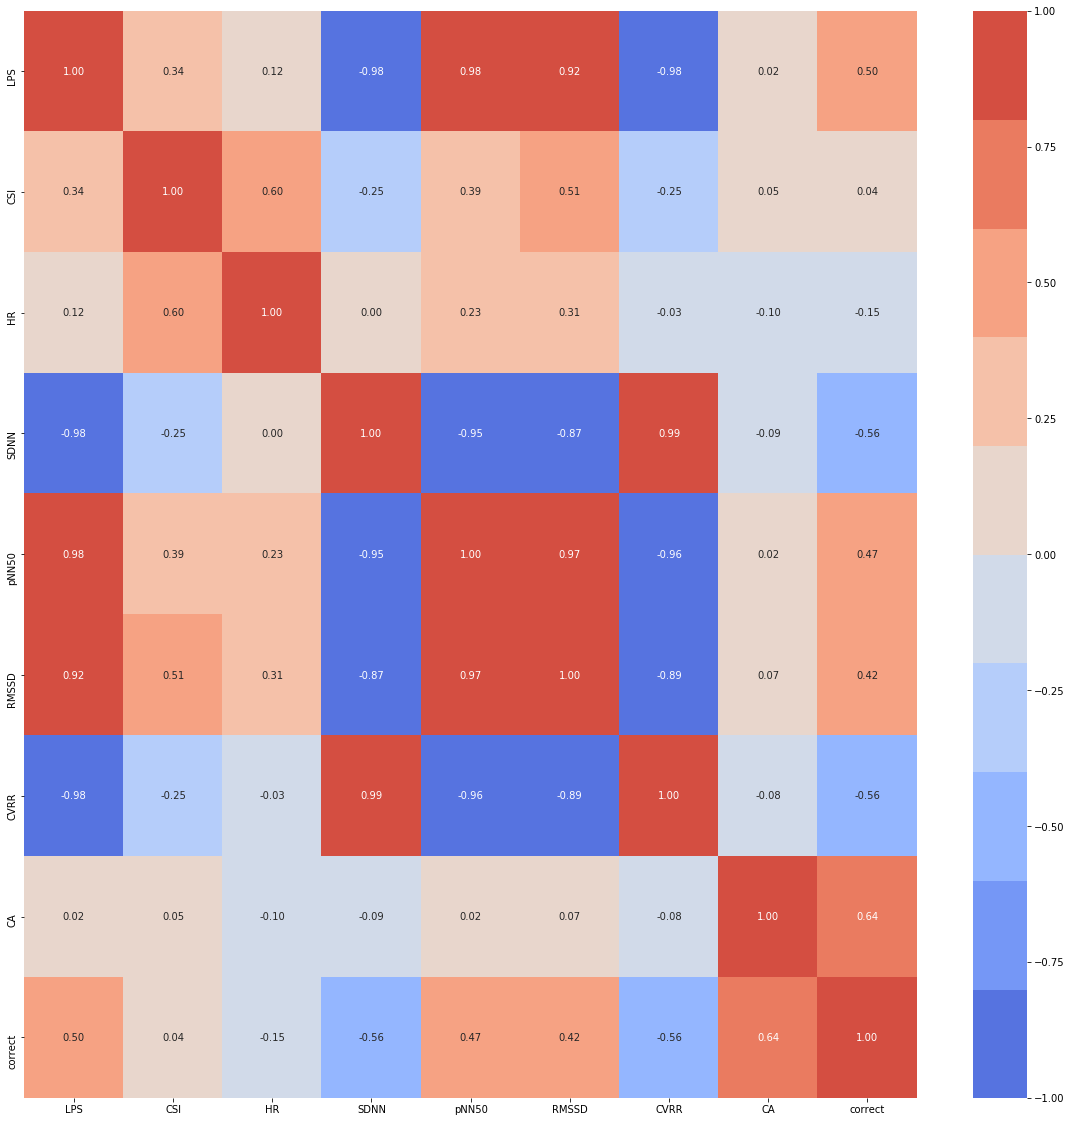

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = df_params[['LPS', 'CSI', 'HR', 'SDNN', 'pNN50', 'RMSSD', 'CVRR', 'CA', 'correct']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [ ]:
cor = df_params[['AC', 'effort', 'frustration', 'mental_demand', 'physical_demand', 'time_pressure', 'WWL', 'VAS', 'CA', 'correct', 'error', 'PE', 'NPE', 'PEm', 'NPEm', 'DMS', 'TO', 'RT']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [ ]:
cor = df_params[['VAS', 'AC', 'effort', 'frustration', 'mental_demand', 'physical_demand', 'time_pressure', 'LPS', 'CSI', 'HR', 'SDNN', 'pNN50', 'RMSSD', 'CVRR', 'HF', 'LF', 'LF/HF']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(df_params['RMSSD'], df_params['VAS'])